[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tdene/synth_opt_adders/blob/master/docs/notebooks/tree_demo.ipynb)

# Trees [structures that generate one bit of the result]

## Setup (RUN ME before executing any code in this section)

In [1]:
!pip install --upgrade git+https://github.com/tdene/synth_opt_adders.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/tdene/synth_opt_adders.git to /tmp/pip-req-build-a8rtu625
  Running command git clone --filter=blob:none --quiet https://github.com/tdene/synth_opt_adders.git /tmp/pip-req-build-a8rtu625
  Resolved https://github.com/tdene/synth_opt_adders.git to commit 8fd7d6c3257f73ae3e278281be636dc098a9b015
  Preparing metadata (setup.py) ... done
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## Generating a classic structure [LEGACY]

Note: this section is shown simply for illustrative purposes.<br>
Many of the functions used here-in are **legacy** functions, supported only for backwards compatibility with past diagrams and methods.<br>
The code in this section should be avoided in production.

The theory section discusses four classic, regular, structures.<br>
These architectures can be readily generated under this library using aliases.<br>
Note again that the "alias" parameter is legacy, supported only for backwards compatibility, and should not actually be used.

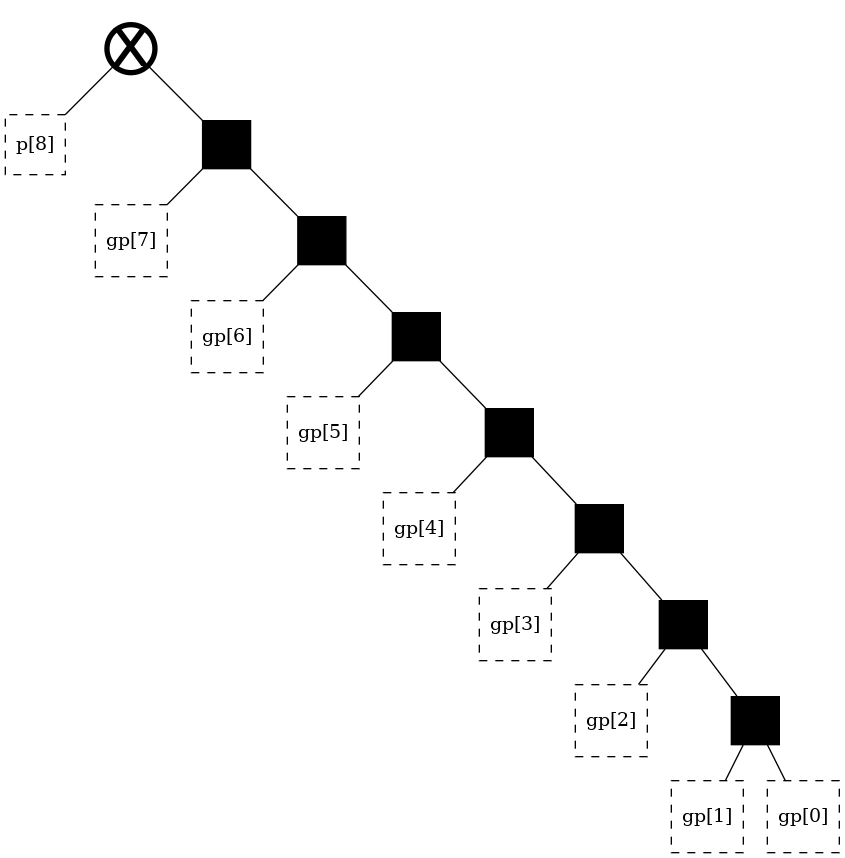

In [4]:
from pptrees.AdderTree import AdderTree as tree

width = 9
t = tree(width, alias = "ripple-carry")
t

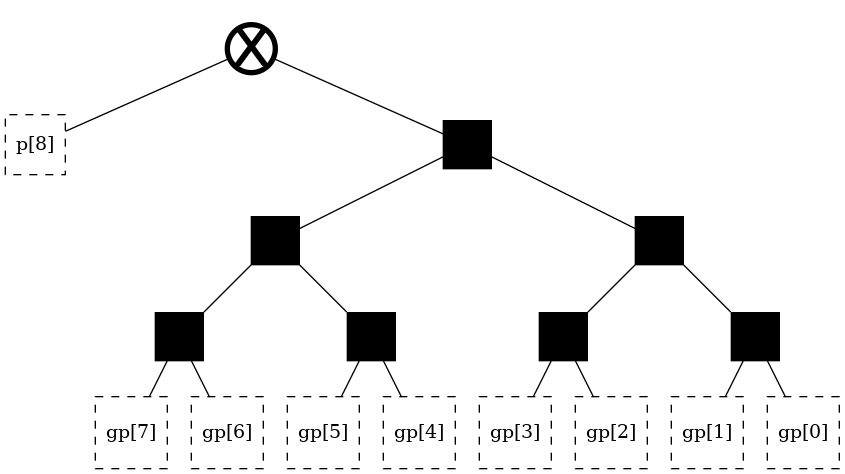

In [5]:
from pptrees.AdderTree import AdderTree as tree

width = 9
t = tree(width, alias = "sklansky")
t

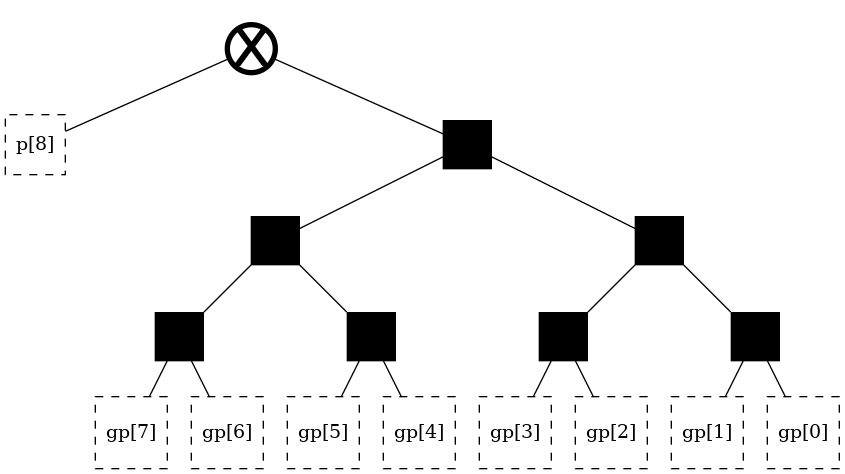

In [6]:
from pptrees.AdderTree import AdderTree as tree

width = 9
t = tree(width, alias = "kogge-stone")
t

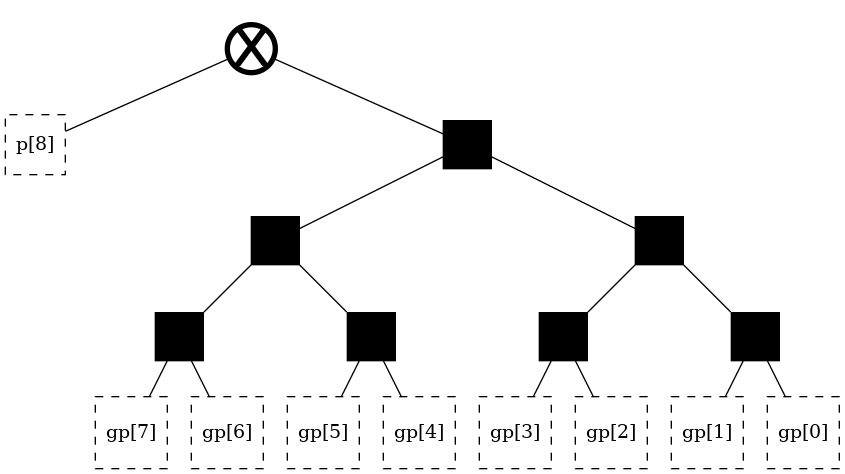

In [7]:
from pptrees.AdderTree import AdderTree as tree

width = 9
t = tree(width, alias = "brent-kung")
t

## How many possible trees are there?

In [8]:
from pptrees.util import catalan

width = 9
print("There are {0} possible trees of width {1}".format(catalan(width-1),width))

There are 1430 possible trees of width 9


## What do all of these trees look like?

Note that while generating the tree structures is fast, generating the diagrams can be very slow.

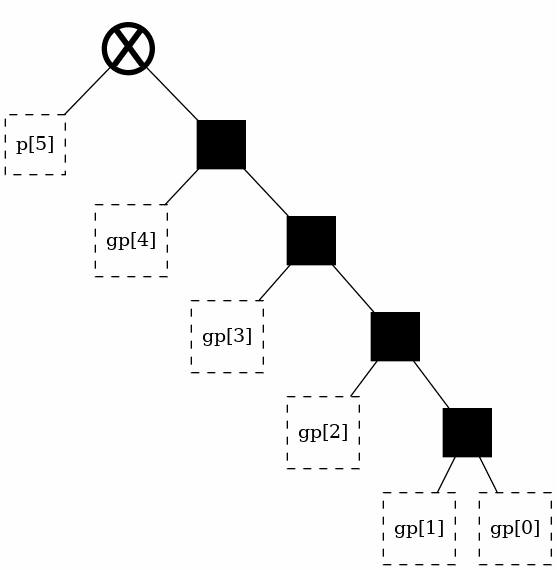

In [2]:
from pptrees.AdderTree import AdderTree as tree
from pptrees.util import catalan

width = 6
# Generate all trees of width 9
list_of_trees=[]
for a in range(catalan(width-1)):
  t = tree(width, start_point = a)
  list_of_trees.append(t)

# Visualize the trees in GIF form
from pptrees.util import display_gif as display_gif
from IPython.display import Image

Image(display_gif(list_of_trees))

## How do I get the tree that I want?

The number of total possible trees is known. Thus it is possible to assign an integer ID to every possible structure.<br>
The labeling I chose is based on an order that arose naturally.<br>
*If you, reader, happen to know the name of this specific tree traversal, please contact me as I've so far been unable to find it in literature.*

To get a desired structure, simply initialize it with its label.

There are 55534064877048198 possible trees of width 33
Here is one of them:


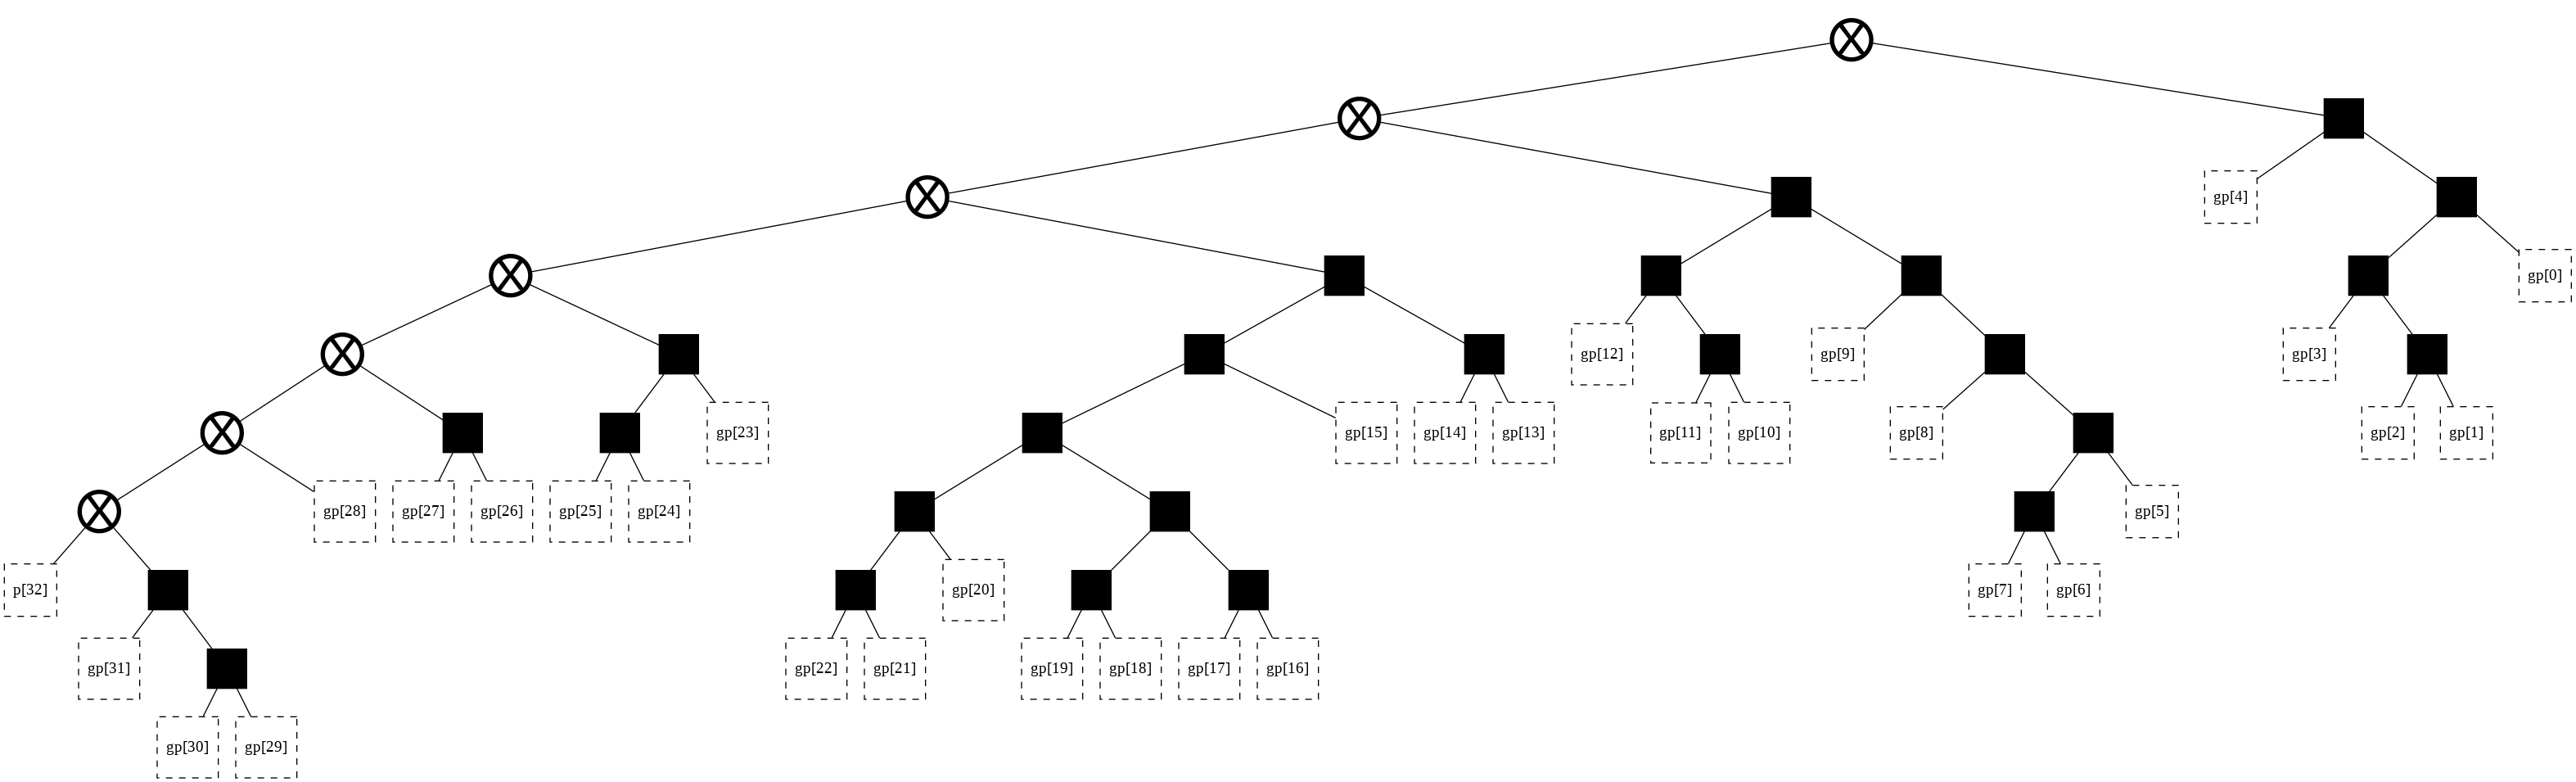

In [ ]:
from pptrees.AdderTree import AdderTree as tree
from pptrees.util import catalan

width = 33
# First, check the total number of structures
print("There are {0} possible trees of width {1}".format(catalan(width-1),width))
print("Here is one of them:")

t = tree(width, start_point = 33416136136136512)
t

Here is another one:


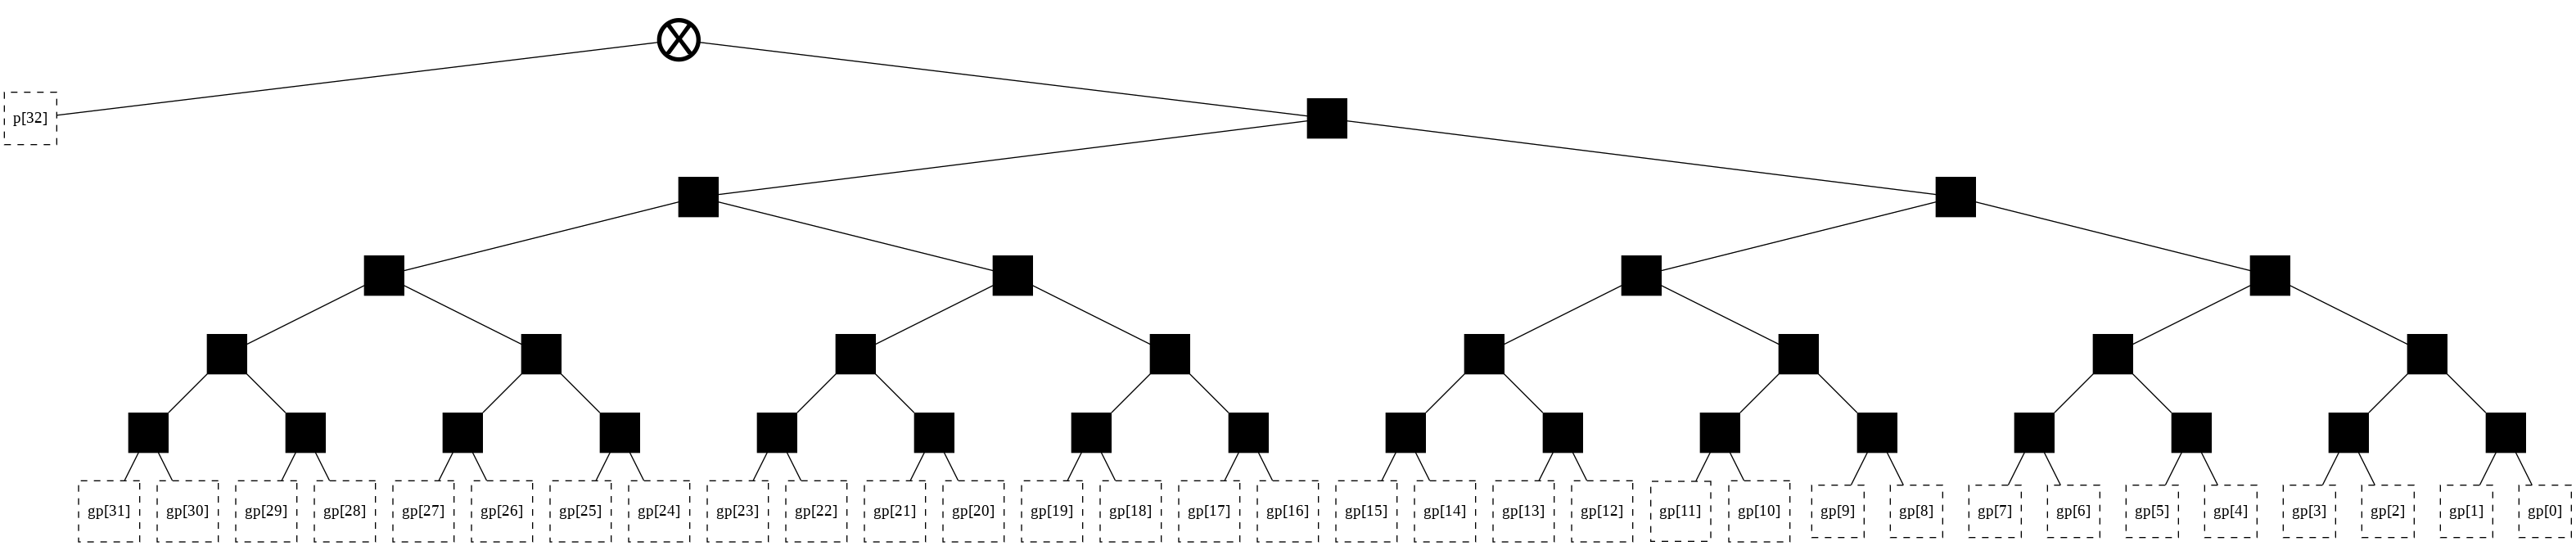

In [ ]:
print("Here is another one:")

t = tree(width, start_point = catalan(width-2)//2)
t

This order begins and ends with slower, **O(n)**, structures. In the middle are better-balanced, **O(lg n)**. However, each of these possible structures has useful delay, power, or area characteristics when viewed as a part of the complete adder (forest) structure.

## Okay, I have a tree. How do I make it faster?

**Theory**

In general, for the tree to be faster, it must be more balanced.<br>
Keep in mind, however, that the speed of each individual tree is greatly affected by the forest it is a part of.

If every tree in a forest is left-balanced (more commonly known as "complete"), theoretically each of the individual trees will be very fast, but as part of the greater forest they will each incur a delay penalty due to a large amount of necessary routing tracks.

If each tree in a forest is right-balanced, theoretically each of the individual trees will be very fast, but as part of the greater forest they will each incur a delay penalty due to a large amount of fan-out.

**Application**

The library supports four methods of transforming trees.

*   left_rotate - Rotates a given node left
*   right_rotate - Rotates a given node right
*   left_shift - Shifts a given node left into another subtree; the equivalent of AVL trees' RL rotate, except this is a generalized RRRRRRRR...L rotate.
*   right_shift - Shifts a given node right into another subtree; the equivalent of AVL trees' LR rotate, except this is a generalized LLLLLLLL...R rotate.



There are 4862 possible trees of width 10


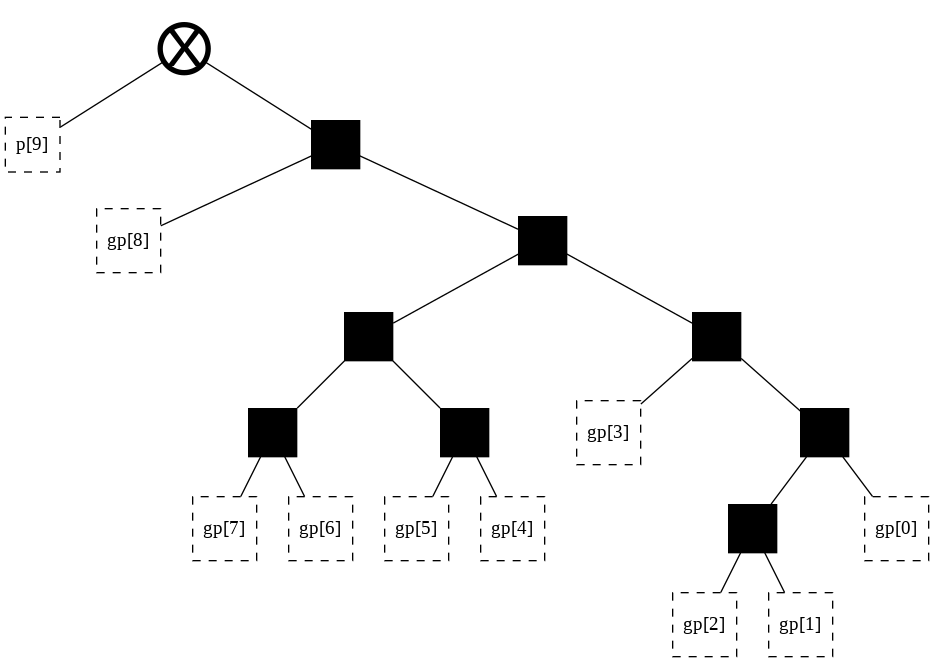

In [ ]:
from pptrees.AdderTree import AdderTree as tree
from pptrees.util import catalan

width = 10
# First, check the total number of structures
print("There are {0} possible trees of width {1}".format(catalan(width-1),width))

# Start at some initial point
t = tree(width, start_point = 209)
t

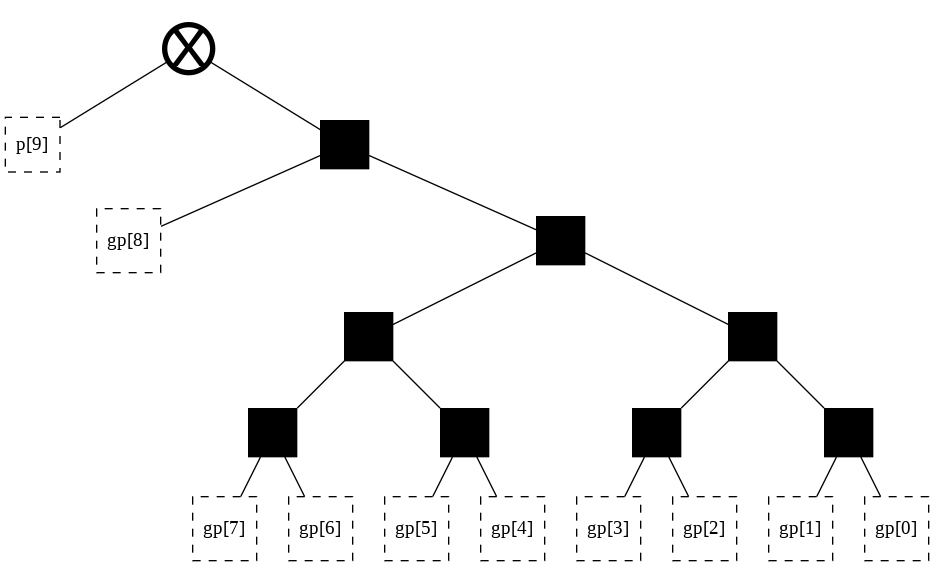

In [ ]:
# Speed up the tree
t = tree(width, start_point = 209)

t.right_rotate(t.root[1][1][1][1][0])
t.left_rotate(t.root[1][1][1][1])
t

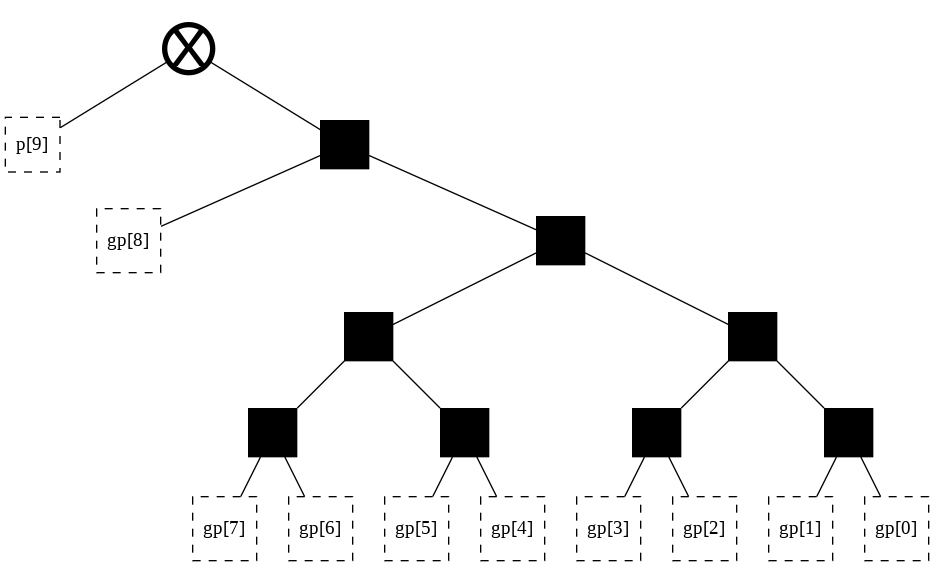

In [ ]:
# Or do it with a left-shift (RL rotate)
t = tree(width, start_point = 209)

t.left_shift(t.root[1][1][1][1][0])
t

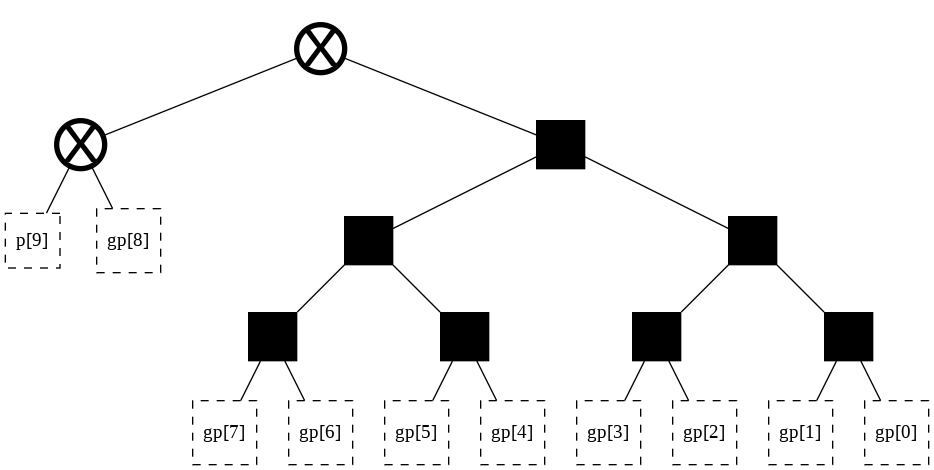

In [ ]:
# Balance the tree even more by using sparseness
t = tree(width, start_point = 209)

t.left_shift(t.root[1][1][1][1][0])
t.left_shift(t.root[1])
t

## Okay, now how do I make a tree more power-efficient? Or smaller?

**Theory**

Both area and power consumption are determined primarily not by an individual tree, but rather by the forest it is a part of.

Both area and power consumption fall with an increasing number of shared nodes between trees. That is why serial adders have smaller area than parallel ones, and why the Brent-Kung structure has smaller area than the Kogge-Stone one.

In general, the further right-balanced a tree is, the more nodes it is able to share. This is however just a rule of thumb.

**Application**

See the following example.

In [4]:
# Let's say we only want the 6th and 7th bit of a sum.

from pptrees.AdderTree import AdderTree as tree
from pptrees.util import catalan

width_big = 7
width_small = 6
# First, check the total number of structures
print("There are {0} possible trees of width {1}".format(catalan(width_big-1),width_big))
print("There are {0} possible trees of width {1}".format(catalan(width_small-1),width_small))

# Next, initialize two random trees
t_big = tree(width_big, start_point = 72)
t_small = tree(width_small, start_point = 12)

There are 132 possible trees of width 7
There are 42 possible trees of width 6


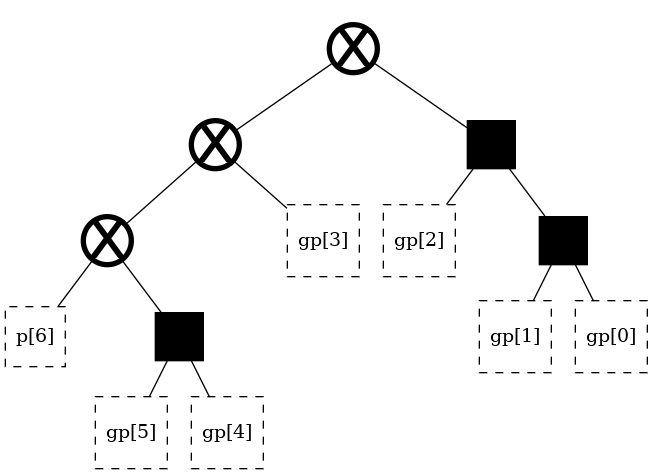

In [5]:
t_big

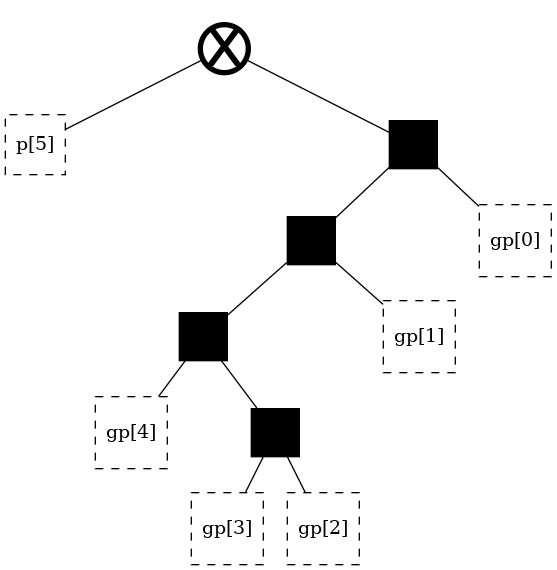

In [6]:
t_small

Note that these two trees have no nodes in common. Let's give them some.

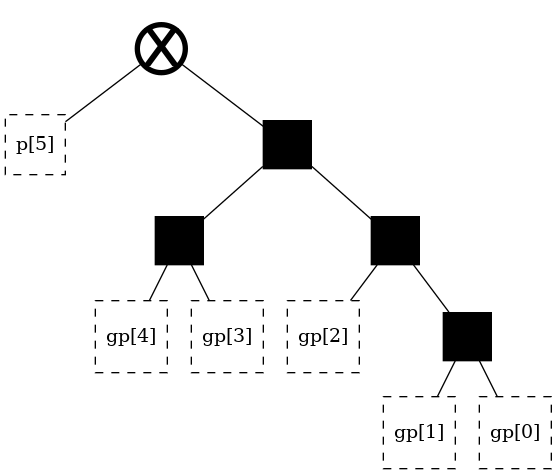

In [7]:
t_small = tree(width_small, start_point = 12)
# Make the left-hand side of the trees similar
t_small.right_rotate(t_small.root[1][0])
t_small.right_shift(t_small.root[1][0][1])
t_small

The two trees have gone from sharing 0 nodes, to sharing 2 nodes. Area and power consumption has been reduced.

We can visualize the shared nodes by creating a make-shift forest and using its methods.

The nodes that have been painted partially red in t_small are shared between the two trees. This is merely cosmetic, intended to serve as a visual indicator.

Note that the equivalent nodes in t_big have not been painted red. This is intentional.<br>
The red marks nodes that need not be implemented in hardware.<br>
Shared nodes only need to be implemented in hardware once, but they still need to be implemented that one single time.

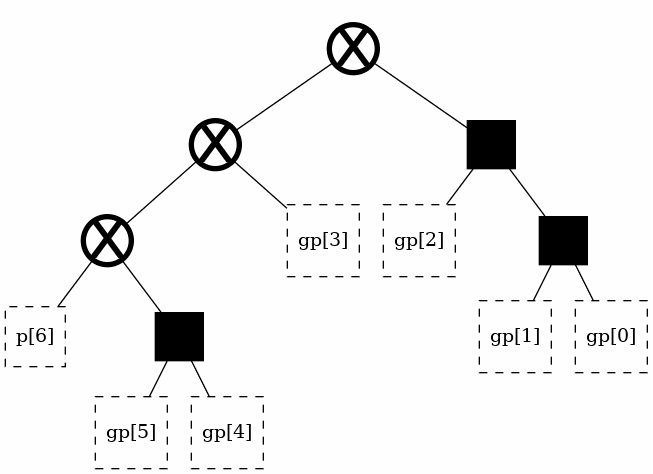

In [8]:
from pptrees.AdderForest import AdderForest as forest
f = forest(2, initialized_trees=[t_big, t_small])
f.reset_equivalent_nodes()
f.find_equivalent_nodes()
f

In [ ]:
f.reset_equivalent_nodes()

Let's go even further

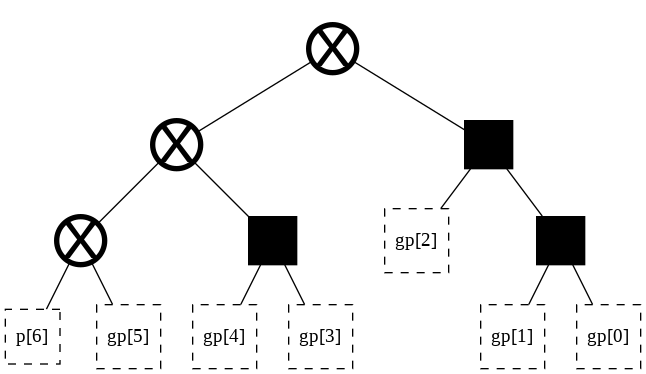

In [ ]:
t_big = tree(width_big, start_point = 72)
# Make the right-hand side of the trees similar
t_big.right_shift(t_big.root[0][0][1])
t_big

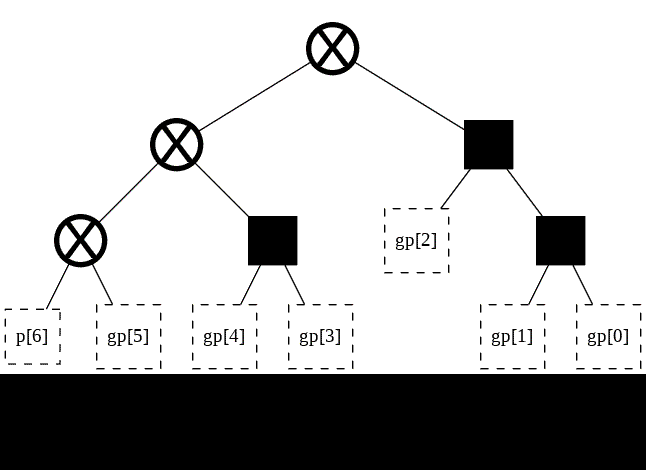

In [ ]:
f = forest(2, initialized_trees=[t_big, t_small])
f.find_equivalent_nodes()
f

In [ ]:
f.reset_equivalent_nodes()

The two trees now share 3 nodes. Also, t_big is now more balanced!<br>
Let's make t_small a bit more balanced as well.

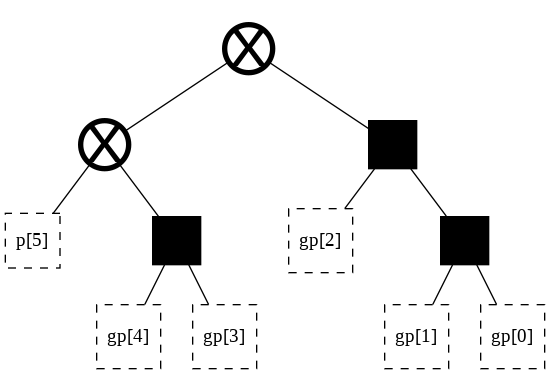

In [ ]:
t_small = tree(width_small, start_point = 12)
# Make the left-hand side of the trees similar
t_small.right_rotate(t_small.root[1][0])
t_small.right_shift(t_small.root[1][0][1])
# Reduce the height of t_small
t_small.left_rotate(t_small.root[1])
t_small

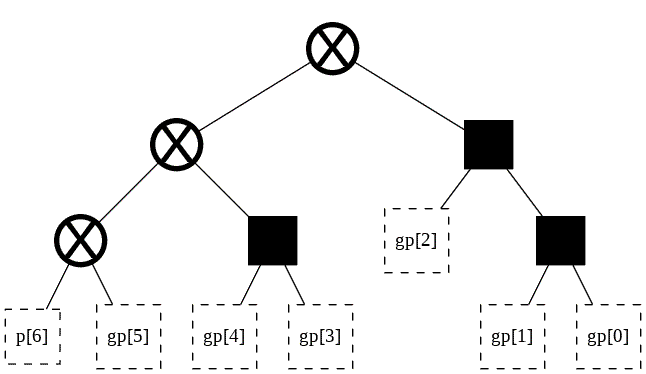

In [ ]:
f = forest(2, initialized_trees=[t_big, t_small])
f.find_equivalent_nodes()
f

The two trees share 3 nodes still. The only way they could share more would be by making both of them serial.

Moreover, the two trees are both balanced, with **O(lg n)** delay.

This appears to be a good structure.

### How do I get the ID of a tree after I've modified it?

The "rank" method gets the ID of a tree, while the "unrank" method creates a tree given a certain ID

In [ ]:
# Let's say we only want the 6th and 7th bit of a sum.

from pptrees.AdderTree import AdderTree as tree
from pptrees.util import catalan

width_big = 7
width_small = 6
# First, check the total number of structures
print("There are {0} possible trees of width {1}".format(catalan(width_big-1),width_big))
print("There are {0} possible trees of width {1}".format(catalan(width_small-1),width_small))

# Next, initialize two random trees
t_big = tree(width_big, start_point = 72)
t_small = tree(width_small, start_point = 12)

# Make the right-hand side of the trees similar
t_big.right_shift(t_big.root[0][0][1])

# Make the left-hand side of the trees similar
t_small.right_rotate(t_small.root[1][0])
t_small.right_shift(t_small.root[1][0][1])
# Reduce the height of t_small
t_small.left_rotate(t_small.root[1])

print("The rank (ID) of the big tree is {0}".format(t_big.rank()))
print("The rank (ID) of the small tree is {0}".format(t_small.rank()))

There are 132 possible trees of width 7
There are 42 possible trees of width 6
The rank (ID) of the big tree is 70
The rank (ID) of the small tree is 19


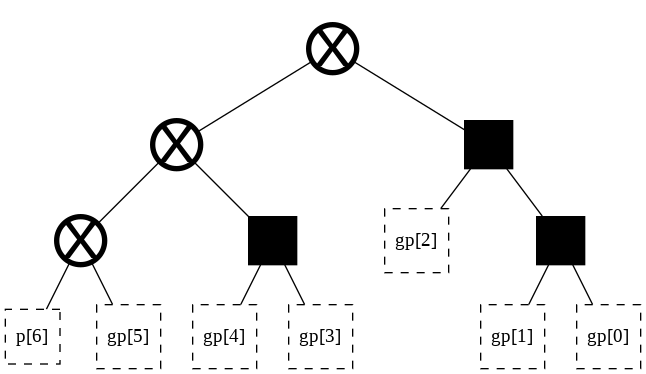

In [ ]:
t = tree(width_big, start_point = 70)
t

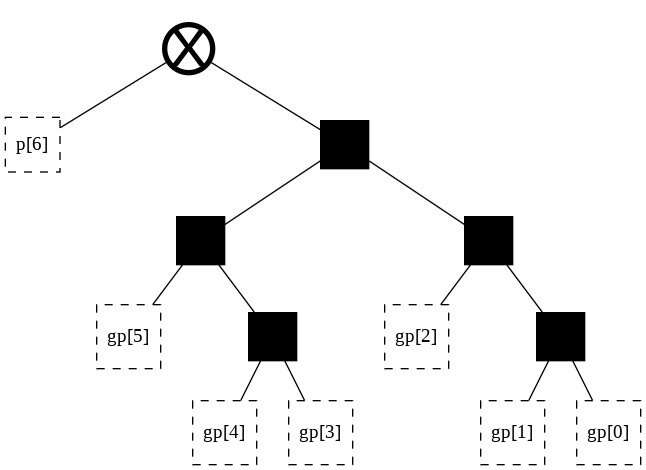

In [ ]:
t = tree(width_big, start_point = 19)
t

### Obtaining a PNG diagram

In [ ]:
from pptrees.AdderTree import AdderTree as tree
from pptrees.util import catalan

width = 33
t = tree(width, start_point = 33416136136136512)
t.png("test.png")

### Obtaining an HDL description

In [9]:
from pptrees.AdderTree import AdderTree as tree
from pptrees.util import catalan

width = 33
t = tree(width, start_point = 33416136136136512)
_ = t.hdl("test.v")

In [ ]:
!cat test.v


module adder(

	input [32:0] a_in,
	input [32:0] b_in,
	output  sum
	);

// start of unnamed graph
	wire n0, n1_adder, n2_adder, n3_adder, n4_adder, n5_adder, n6_adder, n7_adder, n8_adder, n9_adder, n10_adder, n11_adder, n12_adder, n13_adder, n14_adder, n15_adder, n16_adder, n17_adder, n18_adder, n19_adder, n20_adder, n21_adder, n22_adder, n23_adder, n24_adder, n25_adder, n26_adder, n27_adder, n28_adder, n29_adder, n30_adder, n31_adder, n32_adder, n33_adder, n34_adder, n35_adder, n36_adder, n37_adder, n38_adder, n39_adder, n40_adder, n41_adder, n42_adder, n43_adder, n44_adder, n45_adder, n46_adder, n47_adder, n48_adder, n49_adder, n50_adder, n51_adder, n52_adder, n53_adder, n54_adder, n55_adder, n56_adder, n57_adder, n58_adder, n59_adder, n60_adder, n61_adder, n62_adder, n63_adder, n64_adder, n65_adder, n66_adder, n67_adder, n68_adder, n69_adder, n70_adder, n71_adder, n72_adder, n73_adder, n74_adder, n75_adder, n76_adder, n77_adder, n78_adder, n79_adder, n80_adder, n81_adder, n82_adde